### Ordinary Least Squares
Example: diabetes dataset

In [17]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# X,y = load_diabetes() # entire array comes
X, y = load_diabetes(return_X_y=True, as_frame=True)
DF = load_diabetes()
# print("data: ", load_diabetes().data)
# print("info: ", load_diabetes().feature_names)
# X = X[:, [2]] # use only one feature BMI
# print(X)
# X.head()  # if  as_frame = True
# X = X.iloc[:,2] # got converted to 1D, giving error later
X = X.iloc[:, [2]]  # tip to keep it still a dataframe

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

In [3]:
df = pd.DataFrame(data=DF.data, columns=DF.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [16]:
# X_train = X_train.values.reshape(-1, 1) # for single feature
# X_train.shape
# y_train.shape

regressor = LinearRegression().fit(X_train,y_train)

In [ ]:
y_pred = regressor.predict(X_test)

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred)) # Prediction are off by around ~ 50.? units on average
print("Coefficient of Determination: ", r2_score(y_test, y_pred)) # 47.25% BMI influences ==> the rest is influenced by other factors

Mean Squared Error:  2548.07239872597
Coefficient of Determination:  0.47257544798227147


### Plotting the results

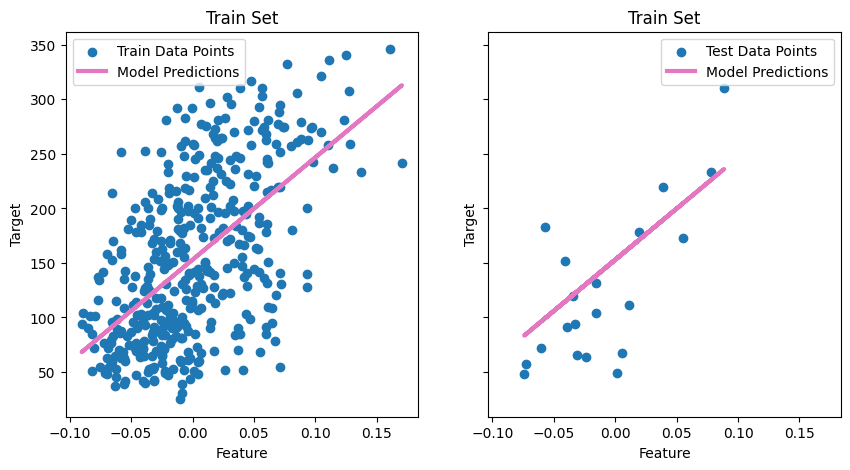

In [46]:
# ax for single Axes object or array of Axes objects
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

# first subplot
ax[0].scatter(X_train, y_train, label="Train Data Points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color="tab:pink",
    label="Model Predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train Set")
ax[0].legend()

# second subplot
ax[1].scatter(X_test, y_test, label="Test Data Points")
ax[1].plot(
    X_test,
    regressor.predict(X_test),
    linewidth=3,
    color="tab:pink",
    label="Model Predictions",
)
ax[1].set(xlabel="Feature", ylabel="Target", title="Train Set")
ax[1].legend()
plt.show()